In [119]:
import yfinance as yf
from datetime import datetime, timedelta

start_date= datetime.now() - timedelta(days=1825)
end_date = datetime.now()

# 비트코인 가격 데이터 다운로드 (5년치 데이터)
btc = yf.download('BTC-USD', start=start_date, end=end_date, interval='1d')

# 멀티인덱스에서 'Ticker' 레벨을 드롭하고, 컬럼명을 설정
btc.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# 'Date', 'Open', 'High', 'Low', 'Close', 'Volume' 순서로 컬럼 재정렬
btc = btc[['Open', 'High', 'Low', 'Close', 'Volume']]

btc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-03-22,6185.558105,6359.697266,5823.713867,5830.254883,40099664740
2020-03-23,5831.374512,6443.934570,5785.004395,6416.314941,46491916000
2020-03-24,6436.642578,6789.022949,6411.066406,6734.803711,48221910672
2020-03-25,6738.716797,6892.511230,6536.926270,6681.062988,44590107888
2020-03-26,6675.170898,6735.463867,6590.962891,6716.440430,35319797642
...,...,...,...,...,...
2025-03-17,82576.335938,84725.328125,82492.156250,84075.687500,25092785558
2025-03-18,84075.718750,84075.718750,81179.992188,82718.500000,24095774594
2025-03-19,82718.804688,87021.187500,82569.726562,86854.226562,34931960257


In [37]:
import pandas as pd
ntwrk = pd.read_csv('bitcoin_network_data.csv')
utxo = pd.read_csv('bitcoin_utxo_data.csv')
wnet = pd.read_csv('whale_net_ratio.csv')
wex = pd.read_csv('whale_exchange_ratio.csv')
mvrv = pd.read_csv('mvrv_ratio.csv')
day_sum = pd.read_csv('day_sum.csv')

In [38]:
import pandas as pd

# 데이터프레임이 'utxo'라는 이름으로 이미 로드되어 있다고 가정합니다.
utxo.columns = ['date', 'utxo-count']
ntwrk.columns = ['date', 'hash-rate', 'difficulty']

# 'date' 컬럼을 datetime으로 변환
utxo['date'] = pd.to_datetime(utxo['date'])
mvrv['date'] = pd.to_datetime(mvrv['date'])

# 'date'를 인덱스로 설정
utxo.set_index('date', inplace=True)
mvrv.set_index('date', inplace=True)

# 인덱스를 'YYYY-MM-DD H' 형식으로 변경
utxo.index = utxo.index.strftime('%Y-%m-%d %H')
mvrv.index = mvrv.index.strftime('%Y-%m-%d %H')

# 같은 날짜와 시간의 'utxo-count' 평균 계산
utxo = utxo.groupby(utxo.index)['utxo-count'].mean().reset_index()
mvrv = mvrv.groupby(mvrv.index)['MVRV'].mean().reset_index()

dataset = [ntwrk, utxo, wex, wnet, mvrv, day_sum]
for i in dataset:
    # 날짜 컬럼을 datetime 형식으로 변환
    i["date"] = pd.to_datetime(i["date"])
    i.set_index('date', inplace=True)
    i.index.strftime("%Y-%m-%d %H")
    print(i.index.dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [39]:
df = utxo.join([ntwrk, mvrv, day_sum], how='left')
del df['Unnamed: 0']
df

,utxo-count,hash-rate,difficulty,MVRV,sent_amount_btc,received_amount_btc,net
date,,,,,,,
2020-03-29 16:00:00,6.670784e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 17:00:00,6.671034e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 18:00:00,6.670978e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 19:00:00,6.671261e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 20:00:00,6.671664e+07,NaN,NaN,NaN,0.000000,0.000006,-0.000006
...,...,...,...,...,...,...,...
2025-03-28 02:00:00,1.754657e+08,NaN,NaN,NaN,1486.289207,1064.703391,421.585816
2025-03-28 03:00:00,1.754677e+08,NaN,NaN,NaN,1029.083371,1131.173679,-102.090308
2025-03-28 04:00:00,1.754765e+08,NaN,NaN,NaN,2145.377769,1577.445143,567.932626


In [40]:
df2 = df.copy() #원본과 보간 이후 비교 위해 카피함
df2['MVRV'] = df2['MVRV'].interpolate(method='polynomial', order=2)  # 2차 다항식 MVRV 보간
df2['difficulty'] = df2['difficulty'].interpolate(method='polynomial', order=2)  # 2차 다항식 difficulty 보간
df2['utxo-count'] = df2['utxo-count'].interpolate(method='spline', order=3)  # 3차 스플라인 utxo-count 보간
df2['net'] = df2['net'].interpolate(method='polynomial', order=2)  # 가장 가까운 값 보간
df2

,utxo-count,hash-rate,difficulty,MVRV,sent_amount_btc,received_amount_btc,net
date,,,,,,,
2020-03-29 16:00:00,6.670784e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 17:00:00,6.671034e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 18:00:00,6.670978e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 19:00:00,6.671261e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29 20:00:00,6.671664e+07,NaN,NaN,NaN,0.000000,0.000006,-0.000006
...,...,...,...,...,...,...,...
2025-03-28 02:00:00,1.754657e+08,NaN,NaN,NaN,1486.289207,1064.703391,421.585816
2025-03-28 03:00:00,1.754677e+08,NaN,NaN,NaN,1029.083371,1131.173679,-102.090308
2025-03-28 04:00:00,1.754765e+08,NaN,NaN,NaN,2145.377769,1577.445143,567.932626


📌 상관관계 높은 변수들:
Close                  1.000000
High                   0.999366
Low                    0.999193
Open                   0.998400
difficulty             0.940126
MVRV                   0.919909
hash-rate              0.914237
utxo-count             0.883694
sent_amount_btc        0.607742
received_amount_btc    0.607294
Volume                 0.500155
net                    0.029350
Whale Ratio           -0.510613
Name: Close, dtype: float64


c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45458 (\N{HANGUL SYLLABLE NOP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

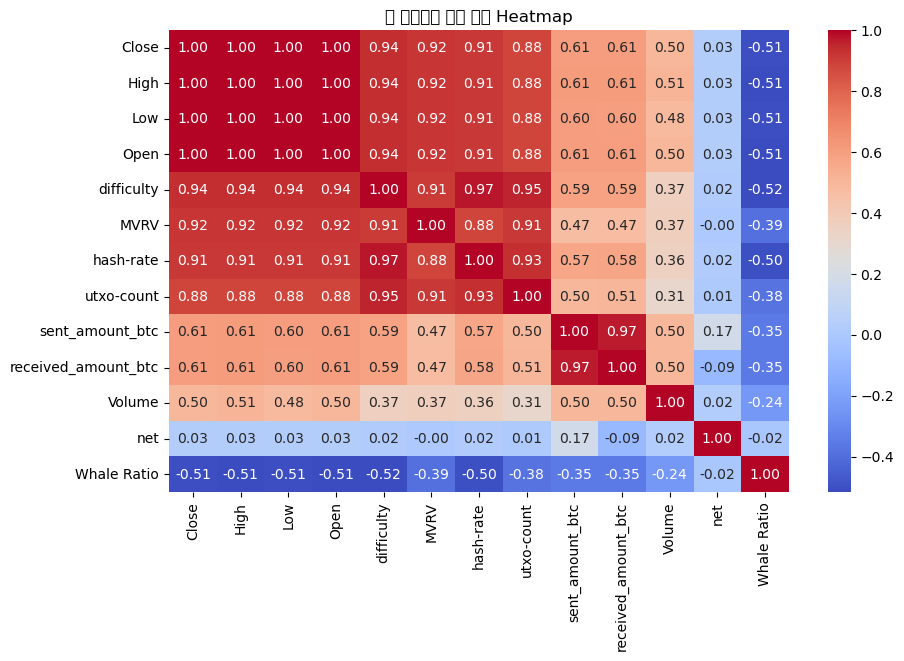

📊 선택된 주요 변수 (|상관계수| ≥ 0.5):
['High', 'Low', 'Open', 'difficulty', 'MVRV', 'hash-rate', 'utxo-count', 'sent_amount_btc', 'received_amount_btc', 'Volume', 'Whale Ratio']


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 1. 데이터 불러오기 (사용자의 DataFrame 가정)
df2.dropna(inplace=True)  # 결측치 제거

# ✅ 2. 상관계수 계산 (피어슨 상관계수)
correlation_matrix = df2.corr()
target_correlation = correlation_matrix['Close'].sort_values(ascending=False)

# ✅ 3. 상위 N개 상관관계 높은 변수 선택 (예: 10개)
top_n = 15
top_features = target_correlation.index[:top_n+1]  # 첫 번째는 자기 자신이므로 제외
print("📌 상관관계 높은 변수들:")
print(target_correlation.head(top_n + 1))

# ✅ 4. 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔹 상관관계 높은 지표 Heatmap")
plt.show()

# ✅ 5. 상관계수 임계값(예: 0.5 이상) 적용하여 주요 변수 선택
threshold = 0.5
selected_features = target_correlation[abs(target_correlation) >= threshold].index.tolist()
selected_features.remove('Close')  # 종가 제거
print(f"📊 선택된 주요 변수 (|상관계수| ≥ {threshold}):\n{selected_features}")

In [25]:
df2

,Open,High,Low,Close,Volume,hash-rate,difficulty,utxo-count,Whale Ratio,MVRV,sent_amount_btc,received_amount_btc,net
Date,,,,,,,,,,,,,
2022-04-21,41371.515625,42893.582031,40063.828125,40527.363281,3.537279e+10,2.371270e+08,2.822593e+13,8.272974e+07,1.000000,1.770067,4.941950,1116.097000,-1111.155050
2022-04-22,40525.863281,40777.757812,39315.417969,39740.320312,2.801172e+10,1.894210e+08,2.822593e+13,8.277059e+07,1.000000,1.768735,163.773185,1045.773185,-882.000000
2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,1.613802e+10,2.287083e+08,2.822593e+13,8.282691e+07,1.000000,1.764347,0.000000,1142.367158,-1142.367158
2022-04-24,39478.375000,39845.925781,39233.539062,39469.292969,1.796440e+10,2.399333e+08,2.822593e+13,8.291527e+07,1.000000,1.759608,0.000000,1000.000000,-1000.000000
2022-04-25,39472.605469,40491.753906,38338.378906,40458.308594,3.544573e+10,2.273052e+08,2.822593e+13,8.290092e+07,1.000000,1.752918,0.000000,1014.792550,-1014.792550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-15,83968.406250,84672.671875,83639.593750,84343.109375,1.365049e+10,7.358976e+08,1.121495e+14,1.757575e+08,0.339712,2.075348,45080.227120,45586.183319,-505.956199
2025-03-16,84333.320312,85051.601562,82017.906250,82579.687500,2.133027e+10,8.083724e+08,1.121495e+14,1.759523e+08,0.264815,2.065312,62564.394268,62350.831628,213.562641
2025-03-17,82576.335938,84725.328125,82492.156250,84075.687500,2.509279e+10,7.804975e+08,1.121495e+14,1.759215e+08,0.449444,2.054699,78217.743372,76363.421425,1854.321947


Epoch 1/50


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - val_loss: 0.0410
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0043 - val_loss: 0.0366
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029 - val_loss: 0.0230
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023 - val_loss: 0.0311
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0025 - val_loss: 0.0248
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026 - val_loss: 0.0108
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020 - val_loss: 0.0206
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.0240
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0022 - val_loss: 0.0134
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016 - val_loss: 0.0068
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0021 - val_loss: 0.0056
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020 - val_l

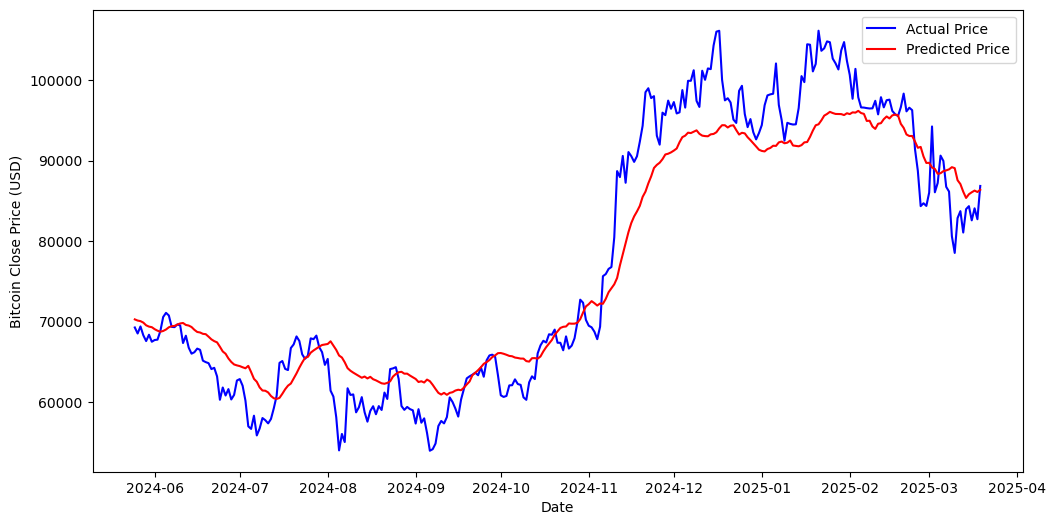

[70270.63026865 70125.91341983 70054.3736393  69871.12128422
 69534.70712242 69373.79512793 69301.73292334 69053.20987638
 68868.29869029 68736.54549815 68830.99114984 69013.11786959
 69289.62561124 69424.02323853 69457.30218937 69629.19047481
 69766.25946634 69822.60586278 69579.51710315 69504.68120384
 69322.40906709 68975.85880148 68707.61290002 68643.73713422
 68474.89183424 68433.32411414 68121.76010271 67789.44993193
 67568.08754997 67415.50741127 66871.81477371 66286.23665296
 65998.03092115 65414.98951926 64982.13695423 64668.5640338
 64553.96466242 64465.21720299 64320.96353426 64195.70563501
 64495.63628606 63722.13630864 62882.75165643 62515.69759314
 61819.01549494 61430.93520993 61403.16056201 61193.43692625
 60748.59284414 60467.29172714 60388.69383607 60514.69228488
 61023.21824345 61588.26025164 62037.46415099 62295.7409089
 62941.14466256 63559.63549872 64272.32962489 64914.60960587
 65488.84520024 65609.34742486 66132.40700518 66408.37616534
 66644.66264064 66879.6349

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.regularizers import l2

# ✅ 1. 데이터 로드 (사용자가 제공한 DataFrame 사용)
df_new = df2[['Close','hash-rate','difficulty', 'MVRV', 'utxo-count', 'Whale Ratio']]

# ✅ 2. 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_new)

# ✅ 3. 학습 데이터 생성 (LSTM 입력 형태로 변환)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # 과거 seq_length일 데이터 입력
        y.append(data[i+seq_length, 0])  # 예측할 close_price (첫 번째 컬럼)
    return np.array(X), np.array(y)

seq_length = 30  # 30일간 데이터로 다음날 예측
X, y = create_sequences(scaled_data, seq_length)

# ✅ 4. 학습 / 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ✅ 5. LSTM 모델 구축
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(seq_length, X.shape[2]))),
    Dropout(0.25),
    LSTM(50, return_sequences=False),
    Dropout(0.25),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# ✅ 6. 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])

# ✅ 7. 모델 평가
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(
    np.concatenate((predicted_prices, np.zeros((predicted_prices.shape[0], X.shape[2]-1))), axis=1)
)[:, 0]  # close_price만 역변환

y_test_actual = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X.shape[2]-1))), axis=1)
)[:, 0]  # 실제 close_price 역변환

# ✅ 8. 결과 시각화
plt.figure(figsize=(12,6))
plt.plot(df_new.index[train_size+seq_length:], y_test_actual, label="Actual Price", color="blue")
plt.plot(df_new.index[train_size+seq_length:], predicted_prices, label="Predicted Price", color="red")
plt.xlabel("Date")
plt.ylabel("Bitcoin Close Price (USD)")
plt.legend()
plt.show()
print(predicted_prices)

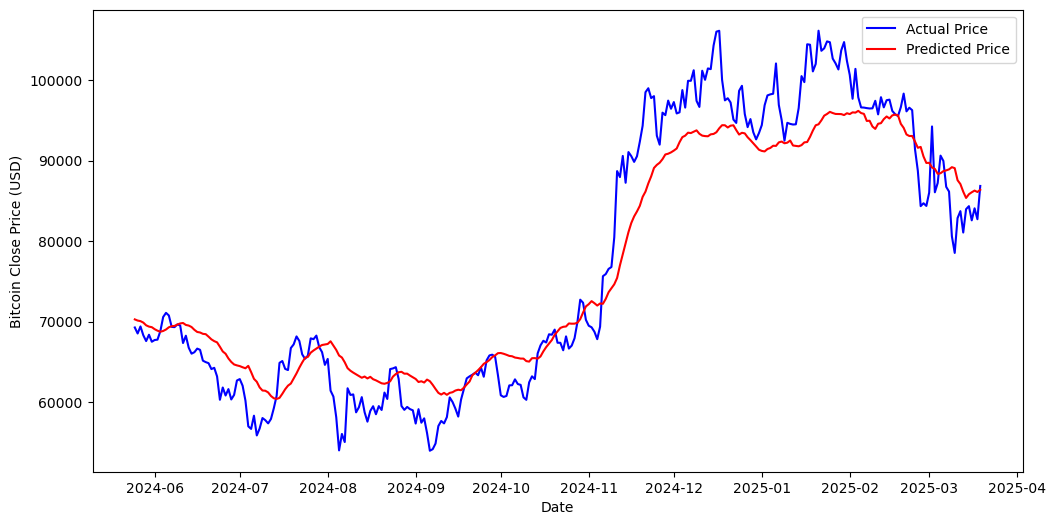

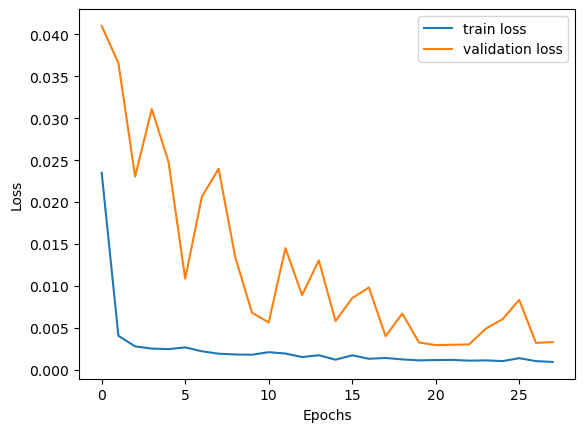

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
🔵 훈련 데이터 평가 지표
RMSE: 2323.249323471971
MAE: 1891.8639244999652
MAPE: 0.06543948462151952
R^2: 0.9758363565676789

🟠 테스트 데이터 평가 지표
RMSE: 4874.418708525224
MAE: 3890.0656692536063
MAPE: 0.05031418157945812
R^2: 0.9136338979700726


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
plt.figure(figsize=(12,6))
plt.plot(df_new.index[train_size+seq_length:], y_test_actual, label="Actual Price", color="blue")
plt.plot(df_new.index[train_size+seq_length:], predicted_prices, label="Predicted Price", color="red")
plt.xlabel("Date")
plt.ylabel("Bitcoin Close Price (USD)")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_predicted_prices = model.predict(X_train)
train_predicted_prices = scaler.inverse_transform(
    np.concatenate((train_predicted_prices, np.zeros((train_predicted_prices.shape[0], X.shape[2]-1))), axis=1)
)[:, 0]

y_train_actual = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X.shape[2]-1))), axis=1)
)[:, 0]

train_mse = mean_squared_error(y_train_actual, train_predicted_prices)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_actual, train_predicted_prices)
train_mape = mean_absolute_percentage_error(y_train_actual, train_predicted_prices)
train_r2 = r2_score(y_train_actual, train_predicted_prices)

mse = mean_squared_error(y_test_actual, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predicted_prices)
mape = mean_absolute_percentage_error(y_test_actual, predicted_prices)
r2 = r2_score(y_test_actual, predicted_prices)

print("🔵 훈련 데이터 평가 지표")
print(f'RMSE: {train_rmse}')
print(f'MAE: {train_mae}')
print(f'MAPE: {train_mape}')
print(f'R^2: {train_r2}')

print("\n🟠 테스트 데이터 평가 지표")
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R^2: {r2}')

기본 모델 예측 기간에 문제 있을 시 사용할 코드

최신 데이터로 시퀀스 만들어 예측할 데이터로 사용

In [ ]:
import numpy as np
import pandas as pd

# 데이터프레임을 numpy 배열로 변환
# 원래 데이터 shape: (1744, 6)에서 7번째 특성을 추가하여 (1744, 7)로 가정
# 실제로는 df에 이미 7개 특성이 있다고 가정
start_date= datetime.now() - timedelta(days=31)
end_date = datetime.now()
start = start_date.strftime("%Y-%m-%d")
end = end_date.strftime("%Y-%m-%d")
data = df_new.loc[start:end, :].values

#i=30
# data = df_new.iloc[:i+29, :].values  # shape: (1744, 7)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 데이터를 (n, 30, 7) 형태의 시퀀스로 변환
def create_sequences(data, seq_length=30):
    sequences = []
    n_samples = len(data) - seq_length + 1

    for i in range(n_samples):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)

    return np.array(sequences)

# 시퀀스 생성
X_new = create_sequences(scaled_data)  # shape: (1715, 30, 7)
X_new.shape

(2, 30, 6)

In [ ]:
# ✅ 7. 모델 평가
predicted_prices = model.predict(X_new)
predicted_prices = scaler.inverse_transform(
    np.concatenate((predicted_prices, np.zeros((predicted_prices.shape[0], X.shape[2]-1))), axis=1)
)[:, 0]  # close_price만 역변환

format = "%Y-%m-%d"
startd = datetime.strptime(start, format)
endd = datetime.strptime(end, format)
a = len(df_new.index)+1
b = len(df_new.index) - 30

y_test_actual = df_new.loc[startd:endd, 'Close'].values
adjusted_index = df_new.index[b:a]  # 인덱스 동일하게 조정

# plt.figure(figsize=(12,6))
# plt.plot(adjusted_index, y_test_actual, label="Actual Price", color="blue")
# plt.plot(adjusted_index, predicted_prices, label="Predicted Price", color="red")
# plt.xlabel("Date")
# plt.ylabel("Bitcoin Close Price (USD)")
# plt.legend()
# plt.show()
print(predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[83551.13756499 83804.97077425]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

mse = mean_squared_error(y_test_actual, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predicted_prices)
mape = mean_absolute_percentage_error(y_test_actual, predicted_prices)
r2 = r2_score(y_test_actual, predicted_prices)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R^2: {r2}')

# 학습 곡선 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ✅ 1. 데이터 로드 (사용자가 제공한 DataFrame 사용)
df_new = df2[['Close','hash-rate','difficulty', 'MVRV', 'utxo-count', 'Whale Ratio']]

# ✅ 2. 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_new)

# ✅ 3. 학습 데이터 생성 (LSTM 입력 형태로 변환)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # 과거 seq_length일 데이터 입력
        y.append(data[i+seq_length, 0])  # 예측할 close_price (첫 번째 컬럼)
    return np.array(X), np.array(y)

seq_length = 60  # 30일간 데이터로 다음날 예측
X, y = create_sequences(scaled_data, seq_length)

# ✅ 4. 학습 / 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


def build_lstm_model():
    # model = Sequential()
    # model.add(LSTM(32, input_shape=(seq_length, X.shape[2]), activation='relu'))
    # model.add(Dense(1))
    # model.compile(optimizer='adam', loss='mean_squared_error')
    
    model = Sequential([
        Bidirectional(LSTM(100, return_sequences=True, input_shape=(seq_length, X.shape[2]))),
        Dropout(0.25),
        LSTM(50, return_sequences=False),
        Dropout(0.25),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
    return model

# 모델 학습 및 예측 반복 실행
max_runs = 20  # 최대 실행 횟수
tolerance = 0.01  # 분산 허용 범위
predictions = []

def create_sequences(data, seq_length=30):
    sequences = []
    n_samples = len(data) - seq_length + 1

    for i in range(n_samples):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)

    return np.array(sequences)

for i in range(max_runs):
    model = build_lstm_model()
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks = [early_stop], verbose=0)
    # 다음 날 CLOSE 값 예측 (가장 최근 데이터 사용)
    latest_sequence = create_sequences(scaled_data, seq_length)
    predicted_close_scaled = model.predict(latest_sequence)[0][0]
    # 스케일링 복원 (Inverse Transform)
    last_known_features = scaled_data[-1, 1:]
    predicted_close_full = np.concatenate(([predicted_close_scaled], last_known_features)).reshape(1, -1)
    predicted_close = scaler.inverse_transform(predicted_close_full)[0][0]
    predictions.append(predicted_close)
    # 분산 확인

    if len(predictions) > 5:  # 최소 5회 이상 실행 후 분산 확인
        variance = np.var(predictions)
        if variance < tolerance:
            print(f"Stopping early at run {i+1}. Variance: {variance:.4f}")
            break

# 평균값 계산
average_prediction = np.mean(predictions)

# 마지막 날짜와 다음 날 계산
last_date = pd.to_datetime(df_new.index.max())
next_day_date = last_date + timedelta(days=1)

# 결과 출력
print(f"Predicted CLOSE for the next day ({next_day_date.strftime('%Y-%m-%d')}): {average_prediction:.2f}")

In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ✅ 1. 데이터 로드 (사용자가 제공한 DataFrame 사용)
df_new = df2[['Close','hash-rate','difficulty', 'MVRV', 'utxo-count', 'Whale Ratio']]

# ✅ 2. 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_new)

# ✅ 3. 학습 데이터 생성 (LSTM 입력 형태로 변환)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # 과거 seq_length일 데이터 입력
        y.append(data[i+seq_length, 0])  # 예측할 close_price (첫 번째 컬럼)
    return np.array(X), np.array(y)

seq_length = 30  # 30일간 데이터로 다음날 예측
X, y = create_sequences(scaled_data, seq_length)

# ✅ 4. 학습 / 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


def build_lstm_model():
    # model = Sequential()
    # model.add(LSTM(32, input_shape=(seq_length, X.shape[2]), activation='relu'))
    # model.add(Dense(1))
    # model.compile(optimizer='adam', loss='mean_squared_error')
    
    model = Sequential([
        LSTM(200, return_sequences=True, input_shape=(seq_length, X.shape[2])),
        Dropout(0.1),
        LSTM(100, return_sequences=False),
        Dropout(0.1),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# 모델 학습 및 예측 반복 실행
max_runs = 20  # 최대 실행 횟수
tolerance = 0.01  # 분산 허용 범위
predictions = []

def create_sequences(data, seq_length=30):
    sequences = []
    n_samples = len(data) - seq_length + 1

    for i in range(n_samples):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)

    return np.array(sequences)

for i in range(max_runs):
    model = build_lstm_model()
    early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks = [early_stop], verbose=0)
    # 다음 날 CLOSE 값 예측 (가장 최근 데이터 사용)
    latest_sequence = create_sequences(scaled_data, seq_length)
    predicted_close_scaled = model.predict(latest_sequence)[0][0]
    # 스케일링 복원 (Inverse Transform)
    predicted_close_scaled = np.array(predicted_close_scaled).reshape(-1, 1)  # (1, 1) 형태로 변환
    predicted_close = scaler.inverse_transform(np.concatenate((predicted_close_scaled, np.zeros((1, scaled_data.shape[1] - 1))), axis=1))[0, 0]

    # last_known_features = scaled_data[-1, 1:]
    # predicted_close_full = np.concatenate(([predicted_close_scaled], last_known_features)).reshape(1, -1)
    # predicted_close = scaler.inverse_transform(predicted_close_full)[0][0]
    predictions.append(predicted_close)
    # 분산 확인

    if len(predictions) > 5:  # 최소 5회 이상 실행 후 분산 확인
        variance = np.var(predictions)
        if variance < tolerance:
            print(f"Stopping early at run {i+1}. Variance: {variance:.4f}")
            break

# 평균값 계산
average_prediction = np.mean(predictions)

# 마지막 날짜와 다음 날 계산
last_date = pd.to_datetime(df_new.index.max())
next_day_date = last_date + timedelta(days=1)

# 결과 출력
print(f"Predicted CLOSE for the next day ({next_day_date.strftime('%Y-%m-%d')}): {average_prediction:.2f}")

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\user\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Predicted CLOSE for the next day (2025-03-21): 29740.02


Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.8578e-04 - val_loss: 0.0018
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.5946e-04 - val_loss: 0.0016
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.6440e-04 - val_loss: 0.0022
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 2.7010e-04 - val_loss: 0.0024
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.0501e-04 - val_loss: 0.0021
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 2.3044e-04 - val_loss: 0.0020
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 2.7180e-04 - val_loss: 0.0030
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 2.8476e-04 - val_loss: 0.0021
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.0566e-04 - val_loss: 0.0025
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 3.3549e-04 - val_loss: 0.0026
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.9694e-04 - val_loss: 0.0013
Epoch 12/50
22/22 ━

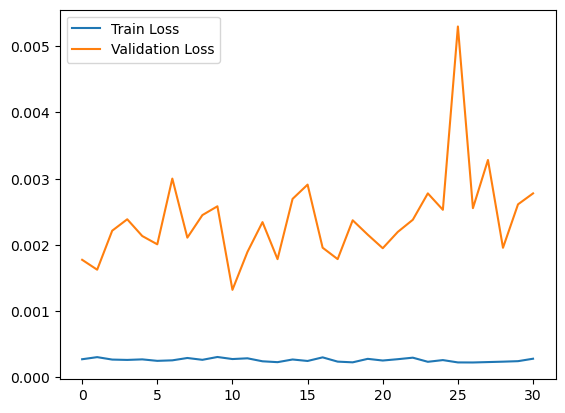

In [133]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()